### 2. Kicking horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from scipy import integrate
from scipy.stats import poisson

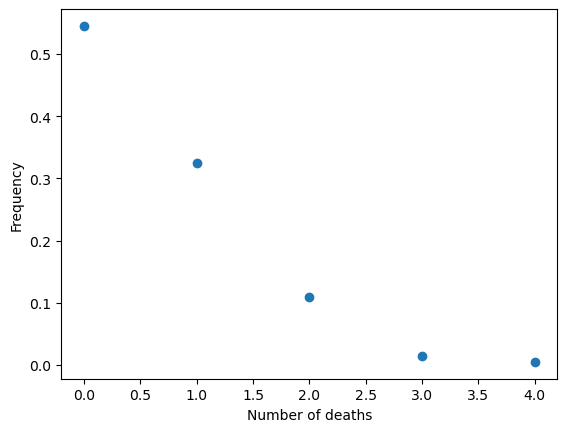

In [4]:
dati = pd.DataFrame(np.array(([0, 109], [1,65], [2,22], [3,3], [4,1])), index = None, columns = ['number of deaths', 'number of groups'])

dati['frequency'] = dati['number of groups']/200

plt.scatter(dati['number of deaths'], dati['frequency'])
plt.xlabel('Number of deaths')
plt.ylabel('Frequency');

In [10]:
mean = np.mean(dati['number of deaths'])
print('Mean: ', mean)
print('Standard deviation: %.02f' %np.std(dati['number of deaths']))
print('Median: ', np.median(dati['number of deaths']))
print('Skewness: ', stats.skew(dati['number of deaths']))
print('Kurtois: ', stats.kurtosis(dati['number of deaths']))

Mean:  2.0
Standard deviation: 1.41
Median:  2.0
Skewness:  0.0
Kurtois:  -1.3


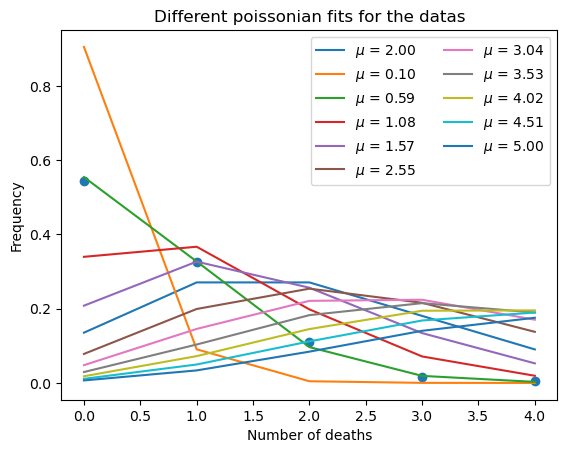

In [12]:
dist = poisson(mean)
plt.plot(dati['number of deaths'], dist.pmf(dati['number of deaths']), label = r'$\mu$ = %0.2f' % mean)

#i try fitting by hand (is it what it means?) with different values of the mean
means = np.linspace(0.1, 5, 11)
for mu in means:
    #only because 2.06 is close to the mean I get from the datas
    #but i want to still use linspace to have different values
    if mu != 2.06:
        dist = poisson(mu)
        plt.plot(dati['number of deaths'], dist.pmf(dati['number of deaths']), label = r'$\mu$ = %0.2f' % mu)

plt.legend(ncol = 2)
plt.scatter(dati['number of deaths'], dati['frequency'])
plt.title('Different poissonian fits for the datas')
plt.xlabel('Number of deaths')
plt.ylabel('Frequency')
plt.show()

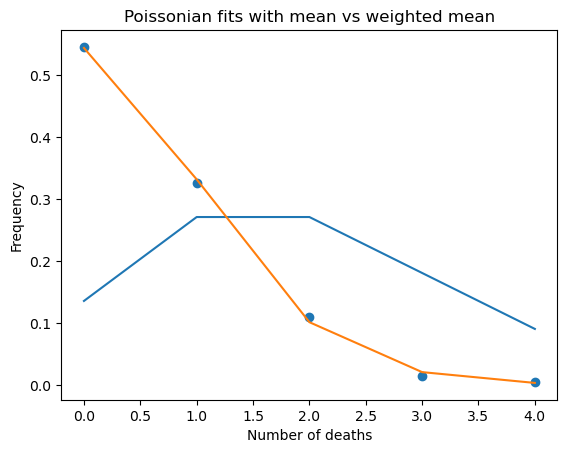

In [14]:
# =============================================================================
# The reason why 0.59 is better than 2 as the value of the mean parameter 
# is that I have to use the weighted mean, since the number of groups is different
# In fact, the weighted mean is equal to 0.61
# =============================================================================
weighted_mean = np.average(dati['number of deaths'], weights = dati['frequency'])

plt.scatter(dati['number of deaths'], dati['frequency'])

dist = poisson(mean)
plt.plot(dati['number of deaths'], dist.pmf(dati['number of deaths']), label = r'$\mu$ = %0.2f' % mean)

dist = poisson(weighted_mean)
plt.plot(dati['number of deaths'], dist.pmf(dati['number of deaths']), label = r'$\mu$ = %0.2f' % weighted_mean)
plt.title('Poissonian fits with mean vs weighted mean')
plt.xlabel('Number of deaths')
plt.ylabel('Frequency')
plt.show()